In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

stock_data = yf.download("TSLA", start="2025-01-01")
stock_data.head(10)

/tmp/ipython-input-3044417144.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download("TSLA", start="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2025-01-02,379.279999,392.730011,373.040009,390.100006,109710700
2025-01-03,410.440002,411.880005,379.450012,381.480011,95423300
2025-01-06,411.049988,426.429993,401.700012,423.200012,85516500
2025-01-07,394.359985,414.329987,390.000000,405.829987,75699500
2025-01-08,394.940002,402.500000,387.399994,392.950012,73038800
2025-01-10,394.739990,399.279999,377.290009,391.399994,62287300
2025-01-13,403.309998,403.790009,380.070007,383.209991,67580500
2025-01-14,396.359985,422.640015,394.540009,414.339996,84565000


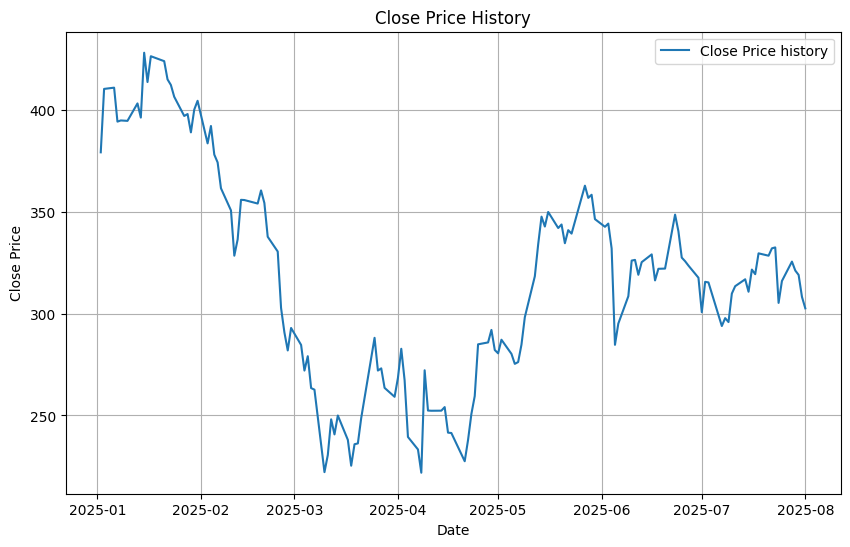

In [52]:
plt.figure(figsize=(10,6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price history')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

### ADF Test to check Stationarity

In [53]:
## ADF test
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
  result = adfuller(series)
  print('ADF Statistic:', result[0])
  print('p-value:', result[1])

  for key, value in result[4].items():
    print('Critial Value (%s): %.3f' % (key, value))

###  KPSS test to check Stationarity

In [54]:
## KPSS test
from statsmodels.tsa.stattools import kpss

def kpss_test(series):
  result = kpss(series, regression='C')
  print('KPSS Statistic:', result[0])
  print('p-value:', result[1])
  for key, value in result[3].item():
    print('Critial Value (%s): %.3f' % (key, value))

In [55]:
prices = stock_data['Close']

### ADF test on stock data to check if it's stationary

In [56]:
adf_test(prices)

ADF Statistic: -1.788596133115473
p-value: 0.3861379142617492
Critial Value (1%): -3.477
Critial Value (5%): -2.882
Critial Value (10%): -2.578


### p_value is greater than 0.05, so the data is not stationary

### Using the detrending approach, to make data stationary

### Using the linear detrending approach

In [57]:
from scipy  import signal

trend  = np.polyfit(np.arange(len(prices)), prices['TSLA'],  1) # Use the 'TSLA' column for polyfit
trend_line = np.polyval(trend, np.arange(len(prices)))
# Convert the trend_line numpy array to a pandas Series with the same index as prices
trend_line_series = pd.Series(trend_line, index=prices.index)
prices_detrended = prices['TSLA'] - trend_line_series # Subtract from the 'TSLA' column

In [58]:
adf_test(prices_detrended.values)

ADF Statistic: -1.7091863936816178
p-value: 0.4263856941432834
Critial Value (1%): -3.477
Critial Value (5%): -2.882
Critial Value (10%): -2.578


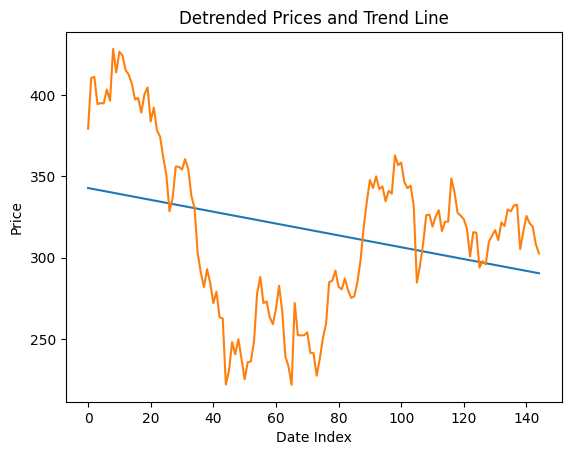

In [59]:
plt.plot(np.arange(len(prices)), trend_line.flatten())
plt.plot(np.arange(len(prices)), prices['TSLA'])
plt.title('Detrended Prices and Trend Line')
plt.xlabel('Date Index')
plt.ylabel('Price')
plt.show()

p_value is greater than threshod..so data is not stationary

### Now using the moving average technique

In [68]:
## using a moving average to remove trend
window = 12
prices_moving_average = prices.rolling(window=window).mean()
prices_detrended = prices - prices_moving_average
prices_detrended = prices_detrended.dropna() # Remove inplace=True

In [69]:
adf_test(prices_detrended)

ADF Statistic: -3.3262371543385227
p-value: 0.013745640646136599
Critial Value (1%): -3.481
Critial Value (5%): -2.884
Critial Value (10%): -2.578


### p-value is lesser than threshod, so the data is now stationary

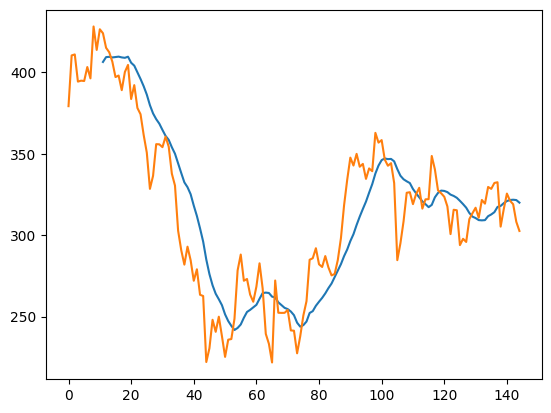

In [72]:
plt.plot(np.arange(len(prices)), prices_moving_average)
plt.plot(np.arange(len(prices)), prices['TSLA'])
plt.show()

### this is the moving average..with window=12

end here!